In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Application Train

In [2]:
# Load Application Train Data
application_train = pd.read_csv("application_train.csv")
print("Shape train awal:", application_train.shape)
display(application_train.head())

Shape train awal: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Cek semua kolom awal
print("\nKolom awal train:")
print(application_train.columns.tolist())


Kolom awal train:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'CO

In [4]:
# Cek tipe data setiap kolom
print("\nTipe data tiap kolom:")
print(application_train.dtypes)


Tipe data tiap kolom:
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [5]:
# Hitung jumlah baris duplikat
duplicate_rows = application_train.duplicated().sum()
print ("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 0


In [6]:
# Cek missing values awal (jumlah & persentase)
missing_train = application_train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
missing_percent_train = (missing_train / len(application_train)) * 100

print("\nTop missing values awal train:")
display(pd.DataFrame({
    "missing_count": missing_train,
    "missing_percent": missing_percent_train
}))


Top missing values awal train:


,missing_count,missing_percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


In [7]:
# Drop kolom dengan suffix _MODE, _MEDI, _AVG
cols_to_drop = [col for col in application_train.columns if col.endswith(('_MODE', '_MEDI', '_AVG'))]
application_train_clean = application_train.drop(columns=cols_to_drop)
print("\nShape train setelah drop MODE/MEDI/AVG:", application_train_clean.shape)

# Drop kolom yang berpotensi redundan
cols_redundant = [
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_MON'
]
application_train_clean = application_train_clean.drop(
    columns=[col for col in cols_redundant if col in application_train_clean.columns]
)
print("Shape train setelah hapus kolom redundan:", application_train_clean.shape)


Shape train setelah drop MODE/MEDI/AVG: (307511, 75)
Shape train setelah hapus kolom redundan: (307511, 72)


In [8]:
# Drop kolom dengan missing tinggi / redundant
cols_drop_high_missing = [
    "OWN_CAR_AGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "EXT_SOURCE_1",
    "OCCUPATION_TYPE"
]
application_train_clean2 = application_train_clean.drop(columns=cols_drop_high_missing)
print("Shape train setelah drop high missing:", application_train_clean2.shape)

Shape train setelah drop high missing: (307511, 65)


In [9]:
# Drop FLAG_DOCUMENT kolom
cols_flag_doc = [col for col in application_train_clean2.columns if col.startswith("FLAG_DOCUMENT")]
application_train = application_train_clean2.drop(columns=cols_flag_doc)
print("Shape train setelah hapus FLAG_DOCUMENT:", application_train.shape)

Shape train setelah hapus FLAG_DOCUMENT: (307511, 45)


In [10]:
# Cek missing values akhir train
missing_train_final = application_train.isnull().sum()
missing_train_final = missing_train_final[missing_train_final > 0].sort_values(ascending=False)
missing_percent_train_final = (missing_train_final / len(application_train)) * 100

print("\nTop missing values akhir train:")
display(pd.DataFrame({
    "missing_count": missing_train_final,
    "missing_percent": missing_percent_train_final
}))


Top missing values akhir train:


,missing_count,missing_percent
EXT_SOURCE_3,60965,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
DAYS_LAST_PHONE_CHANGE,1,0.000325


In [11]:
# Tampilkan kolom akhir train
print("\nKolom akhir train:")
print(application_train.columns.tolist())


Kolom akhir train:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']



[EXT_SOURCE_2 & EXT_SOURCE_3]
EXT_SOURCE_2    float64
EXT_SOURCE_3    float64
dtype: object


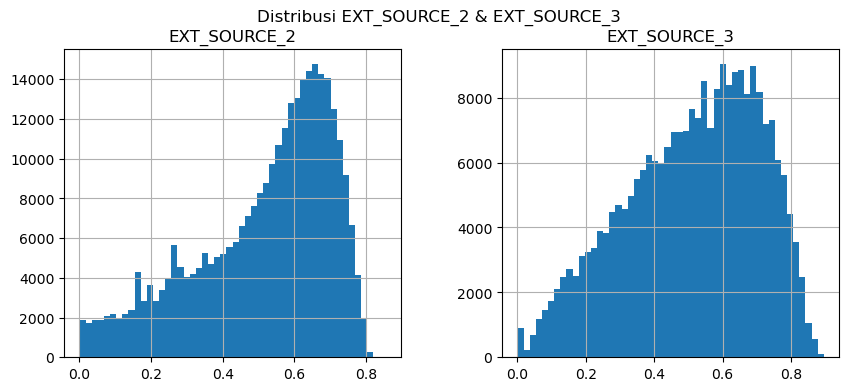

In [12]:
# Cek distribusi EXT_SOURCE_2 & EXT_SOURCE_3
print("\n[EXT_SOURCE_2 & EXT_SOURCE_3]")
print(application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]].dtypes)
application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]].hist(bins=50, figsize=(10,4))
plt.suptitle("Distribusi EXT_SOURCE_2 & EXT_SOURCE_3")
plt.show()

In [13]:
# Iterative imputer untuk EXT_SOURCE_2 & EXT_SOURCE_3
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer(random_state=42, max_iter=10, initial_strategy="median")

application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]] = iter_imputer.fit_transform(
    application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]]
)

# Cek hasil imputasi iterative
print("Jumlah missing setelah imputasi iterative:")
print(application_train[["EXT_SOURCE_2", "EXT_SOURCE_3"]].isnull().sum())

Jumlah missing setelah imputasi iterative:
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64



[AMT_REQ_CREDIT_BUREAU_YEAR]
dtype: float64
count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


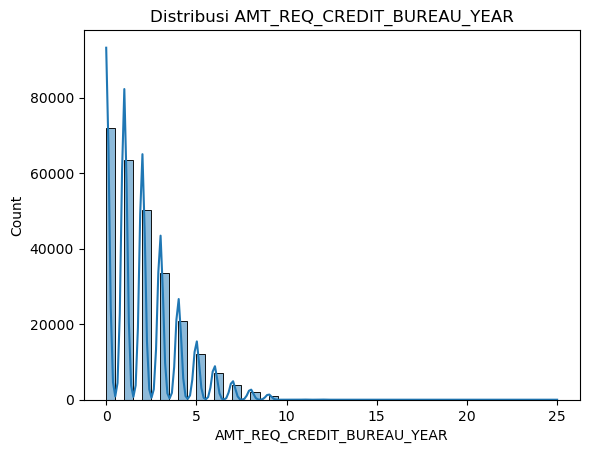

In [14]:
# Analisis AMT_REQ_CREDIT_BUREAU_YEAR
print("\n[AMT_REQ_CREDIT_BUREAU_YEAR]")
print("dtype:", application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].dtype)
print(application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].describe())
sns.histplot(application_train["AMT_REQ_CREDIT_BUREAU_YEAR"], bins=50, kde=True)
plt.title("Distribusi AMT_REQ_CREDIT_BUREAU_YEAR")
plt.show()

In [15]:
# Imputasi AMT_REQ_CREDIT_BUREAU_YEAR dengan 0
application_train["AMT_REQ_CREDIT_BUREAU_YEAR"] = (
    application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)
)
print("Jumlah missing setelah imputasi:")
print(application_train["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum())

Jumlah missing setelah imputasi:
0


In [16]:
# Analisis NAME_TYPE_SUITE
print("\n[NAME_TYPE_SUITE]")
print("dtype:", application_train["NAME_TYPE_SUITE"].dtype)
print("value_counts:")
print(application_train["NAME_TYPE_SUITE"].value_counts(dropna=False))


[NAME_TYPE_SUITE]
dtype: object
value_counts:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [17]:
# Imputasi NAME_TYPE_SUITE dengan kategori "Missing"
application_train["NAME_TYPE_SUITE"] = (
    application_train["NAME_TYPE_SUITE"].fillna("Missing")
)
print(application_train["NAME_TYPE_SUITE"].isnull().sum())
print(application_train["NAME_TYPE_SUITE"].value_counts())

0
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Missing              1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64



[DEF_30_CNT_SOCIAL_CIRCLE]
dtype: float64
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


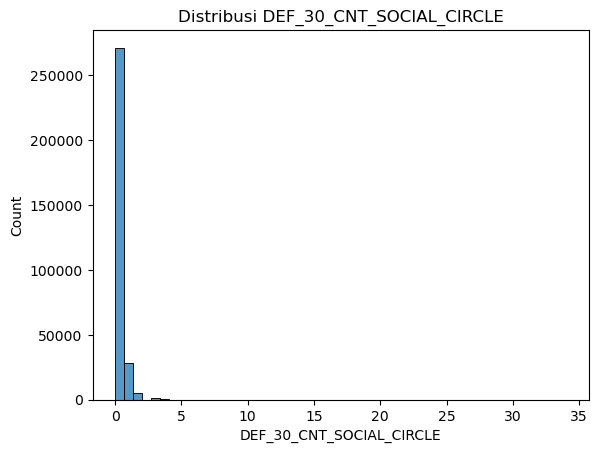

In [18]:
# Analisis DEF_30_CNT_SOCIAL_CIRCLE
print("\n[DEF_30_CNT_SOCIAL_CIRCLE]")
print("dtype:", application_train["DEF_30_CNT_SOCIAL_CIRCLE"].dtype)
print(application_train["DEF_30_CNT_SOCIAL_CIRCLE"].describe())
sns.histplot(application_train["DEF_30_CNT_SOCIAL_CIRCLE"], bins=50, kde=False)
plt.title("Distribusi DEF_30_CNT_SOCIAL_CIRCLE")
plt.show()


[DEF_60_CNT_SOCIAL_CIRCLE]
dtype: float64
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


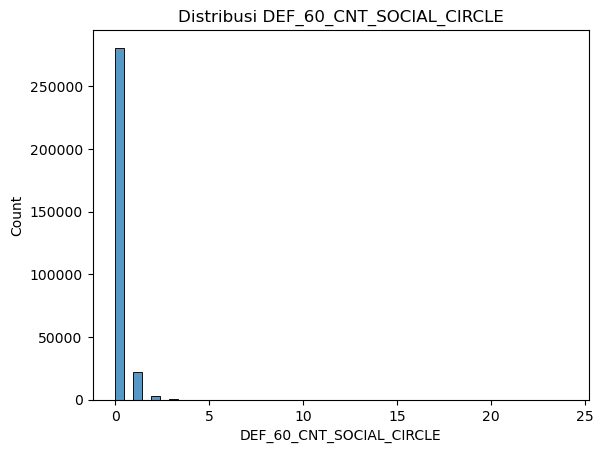

In [19]:
# Analisis DEF_60_CNT_SOCIAL_CIRCLE
print("\n[DEF_60_CNT_SOCIAL_CIRCLE]")
print("dtype:", application_train["DEF_60_CNT_SOCIAL_CIRCLE"].dtype)
print(application_train["DEF_60_CNT_SOCIAL_CIRCLE"].describe())
sns.histplot(application_train["DEF_60_CNT_SOCIAL_CIRCLE"], bins=50, kde=False)
plt.title("Distribusi DEF_60_CNT_SOCIAL_CIRCLE")
plt.show()

In [20]:
# Imputasi DEF_30 & DEF_60 dengan 0
application_train["DEF_30_CNT_SOCIAL_CIRCLE"] = application_train["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0)
application_train["DEF_60_CNT_SOCIAL_CIRCLE"] = application_train["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0)


[AMT_GOODS_PRICE]
dtype: float64
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


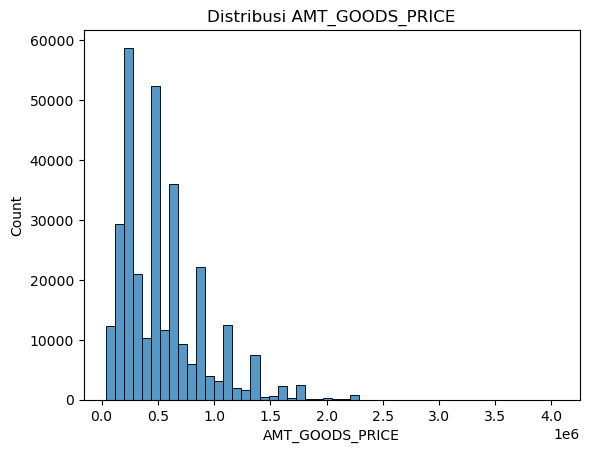

In [21]:
# Analisis AMT_GOODS_PRICE
print("\n[AMT_GOODS_PRICE]")
print("dtype:", application_train["AMT_GOODS_PRICE"].dtype)
print(application_train["AMT_GOODS_PRICE"].describe())
sns.histplot(application_train["AMT_GOODS_PRICE"], bins=50, kde=False)
plt.title("Distribusi AMT_GOODS_PRICE")
plt.show()

In [22]:
# Imputasi AMT_GOODS_PRICE dengan median
application_train["AMT_GOODS_PRICE"] = application_train["AMT_GOODS_PRICE"].fillna(
    application_train["AMT_GOODS_PRICE"].median()
)


[AMT_ANNUITY]
dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


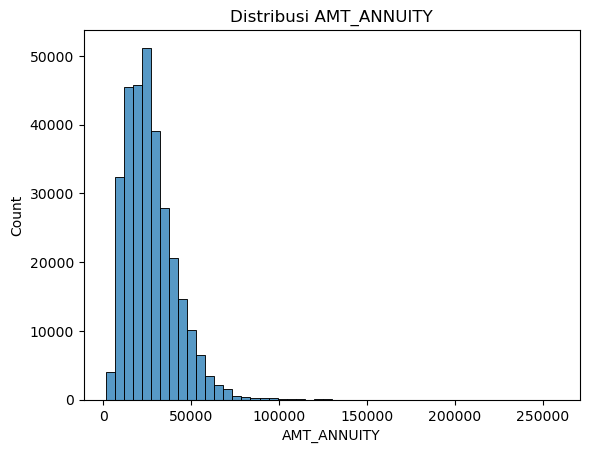

In [23]:
# Analisis AMT_ANNUITY
print("\n[AMT_ANNUITY]")
print("dtype:", application_train["AMT_ANNUITY"].dtype)
print(application_train["AMT_ANNUITY"].describe())
sns.histplot(application_train["AMT_ANNUITY"], bins=50, kde=False)
plt.title("Distribusi AMT_ANNUITY")
plt.show()

In [24]:
# Imputasi AMT_ANNUITY dengan median
application_train["AMT_ANNUITY"] = application_train["AMT_ANNUITY"].fillna(
    application_train["AMT_ANNUITY"].median()
)


[CNT_FAM_MEMBERS]
dtype: float64
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


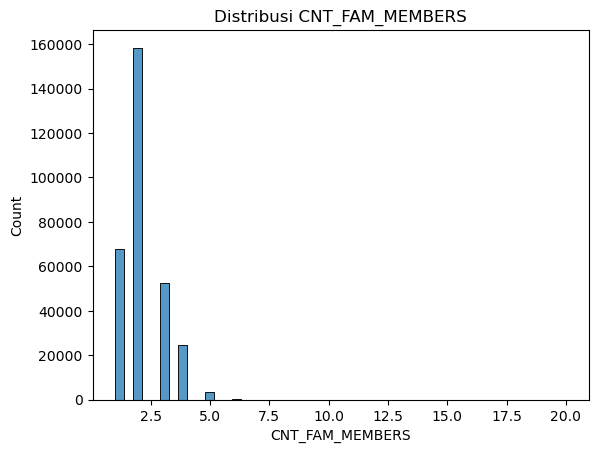

In [25]:
# Analisis CNT_FAM_MEMBERS
print("\n[CNT_FAM_MEMBERS]")
print("dtype:", application_train["CNT_FAM_MEMBERS"].dtype)
print(application_train["CNT_FAM_MEMBERS"].describe())
sns.histplot(application_train["CNT_FAM_MEMBERS"], bins=50, kde=False)
plt.title("Distribusi CNT_FAM_MEMBERS")
plt.show()

In [26]:
# Imputasi CNT_FAM_MEMBERS dengan median (dibulatkan)
application_train["CNT_FAM_MEMBERS"] = application_train["CNT_FAM_MEMBERS"].fillna(
    round(application_train["CNT_FAM_MEMBERS"].median())
)


[DAYS_LAST_PHONE_CHANGE]
dtype: float64
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


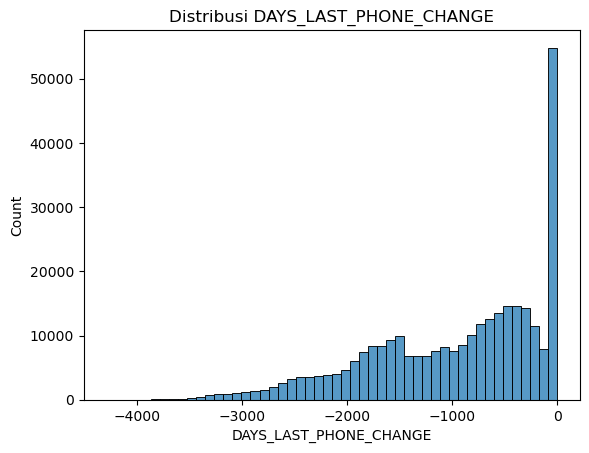

In [27]:
# Analisis DAYS_LAST_PHONE_CHANGE
print("\n[DAYS_LAST_PHONE_CHANGE]")
print("dtype:", application_train["DAYS_LAST_PHONE_CHANGE"].dtype)
print(application_train["DAYS_LAST_PHONE_CHANGE"].describe())
sns.histplot(application_train["DAYS_LAST_PHONE_CHANGE"], bins=50, kde=False)
plt.title("Distribusi DAYS_LAST_PHONE_CHANGE")
plt.show()

In [28]:
# Imputasi DAYS_LAST_PHONE_CHANGE dengan median
application_train["DAYS_LAST_PHONE_CHANGE"] = application_train["DAYS_LAST_PHONE_CHANGE"].fillna(
    application_train["DAYS_LAST_PHONE_CHANGE"].median()
)

In [29]:
# Cek missing values terakhir
print("\nMissing values setelah imputasi:")
print(application_train.isnull().sum().sort_values(ascending=False).head(10))


Missing values setelah imputasi:
SK_ID_CURR                     0
FLAG_WORK_PHONE                0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
dtype: int64


In [30]:
# Cek semua kolom awal
print("\nKolom akhir train:")
print(application_train.columns.tolist())


Kolom akhir train:
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### Application Test

In [31]:
# Load application test
application_test = pd.read_csv("application_test.csv")
print("Shape test awal:", application_test.shape)
display(application_test.head())

Shape test awal: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Hitung jumlah baris duplikat
duplicate_rows = application_test.duplicated().sum()
print ("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 0


In [33]:
# Drop kolom dengan suffix _MODE, _MEDI, _AVG
application_test_clean = application_test.drop(
    columns=[col for col in application_test.columns if col.endswith(('_MODE', '_MEDI', '_AVG'))]
)

In [34]:
# Drop kolom yang sama seperti di train (high missing + redundan)
cols_drop_high_missing = [
    "OWN_CAR_AGE",
    "AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_DAY",
    "AMT_REQ_CREDIT_BUREAU_WEEK",
    "AMT_REQ_CREDIT_BUREAU_QRT",
    "EXT_SOURCE_1",
    "OCCUPATION_TYPE"
]

cols_redundant = [
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_MON'
]

cols_to_drop_test = cols_drop_high_missing + cols_redundant

application_test_clean2 = application_test_clean.drop(
    columns=[col for col in cols_to_drop_test if col in application_test_clean.columns]
)

In [35]:
# Drop FLAG_DOCUMENT kolom sama seperti di train
cols_flag_doc = [col for col in application_test_clean2.columns if col.startswith("FLAG_DOCUMENT")]
application_test = application_test_clean2.drop(columns=cols_flag_doc)

In [36]:
# Ambil kolom final dari train sebagai acuan (tanpa TARGET)
train_cols = [col for col in application_train.columns if col != "TARGET"]

# Tambahkan kolom yang hilang di test jika ada
for col in train_cols:
    if col not in application_test.columns:
        application_test[col] = pd.NA

# Urutkan kolom test agar sama dengan train
application_test = application_test[train_cols]

In [37]:
# Tampilkan hasil akhir
print("Jumlah kolom test setelah disamakan dengan train:", application_test.shape[1])
print("Kolom akhir test:")
print(application_test.columns.tolist())

Jumlah kolom test setelah disamakan dengan train: 44
Kolom akhir test:
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_B

In [38]:
# Iterative imputer untuk EXT_SOURCE_2 & EXT_SOURCE_3
application_test[["EXT_SOURCE_2", "EXT_SOURCE_3"]] = iter_imputer.transform(
    application_test[["EXT_SOURCE_2", "EXT_SOURCE_3"]]
)

In [39]:
# Imputasi AMT_REQ_CREDIT_BUREAU_YEAR dengan 0
application_test["AMT_REQ_CREDIT_BUREAU_YEAR"] = (
    application_test["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)
)

In [40]:
# Imputasi NAME_TYPE_SUITE dengan kategori Missing
application_test["NAME_TYPE_SUITE"] = (
    application_test["NAME_TYPE_SUITE"].fillna("Missing")
)

In [41]:
# Imputasi DEF_30 dan DEF_60 dengan 0
application_test["DEF_30_CNT_SOCIAL_CIRCLE"] = (
    application_test["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0)
)
application_test["DEF_60_CNT_SOCIAL_CIRCLE"] = (
    application_test["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0)
)

In [42]:
# Imputasi AMT_GOODS_PRICE dengan median dari train
median_goods_price = application_train["AMT_GOODS_PRICE"].median()
application_test["AMT_GOODS_PRICE"] = (
    application_test["AMT_GOODS_PRICE"].fillna(median_goods_price)
)

In [43]:
# Imputasi AMT_ANNUITY dengan median dari train
median_annuity = application_train["AMT_ANNUITY"].median()
application_test["AMT_ANNUITY"] = (
    application_test["AMT_ANNUITY"].fillna(median_annuity)
)

In [44]:
# Imputasi CNT_FAM_MEMBERS dengan median (dibulatkan) dari train
median_fam = round(application_train["CNT_FAM_MEMBERS"].median())
application_test["CNT_FAM_MEMBERS"] = (
    application_test["CNT_FAM_MEMBERS"].fillna(median_fam)
)


In [45]:
# Imputasi DAYS_LAST_PHONE_CHANGE dengan median dari train
median_phone = application_train["DAYS_LAST_PHONE_CHANGE"].median()
application_test["DAYS_LAST_PHONE_CHANGE"] = (
    application_test["DAYS_LAST_PHONE_CHANGE"].fillna(median_phone)
)

In [46]:
# Cek missing values akhir di test
print("Missing values akhir test setelah imputasi:")
print(application_test.isnull().sum().sort_values(ascending=False).head(10))

Missing values akhir test setelah imputasi:
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
dtype: int64


In [47]:
# Cek semua kolom awal
print("\nKolom akhir test:")
print(application_test.columns.tolist())


Kolom akhir test:
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### Bureau

In [48]:
# Load bureau
bureau = pd.read_csv("bureau.csv")
print("Bureau shape:", bureau.shape)
display(bureau.head())

Bureau shape: (1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [49]:
# Cek semua kolom awal
print("\nKolom awal bureau:")
print(bureau.columns.tolist())


Kolom awal train:
['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']


In [50]:
# Hitung jumlah baris duplikat
duplicate_rows = bureau.duplicated().sum()
print ("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 0


In [51]:
# Cek tipe data setiap kolom
print("Tipe data setiap kolom:\n")
print(bureau.dtypes)

Tipe data setiap kolom:

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object


In [52]:
# Cek tipe data & missing values awal
print("\nTipe data tiap kolom:\n", bureau.dtypes)
missing_count = bureau.isnull().sum()
missing_percent = (missing_count / len(bureau)) * 100
missing_df = pd.DataFrame({"missing_count": missing_count,
                           "missing_percent": missing_percent,
                           "dtype": bureau.dtypes})
print("\nTop missing values di bureau.csv:")
display(missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False))



Tipe data tiap kolom:
 SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

Top missing values di bureau.csv:


,missing_count,missing_percent,dtype
AMT_ANNUITY,1226791,71.473490,float64
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264,float64
DAYS_ENDDATE_FACT,633653,36.916958,float64
AMT_CREDIT_SUM_LIMIT,591780,34.477415,float64
AMT_CREDIT_SUM_DEBT,257669,15.011932,float64
DAYS_CREDIT_ENDDATE,105553,6.149573,float64
AMT_CREDIT_SUM,13,0.000757,float64


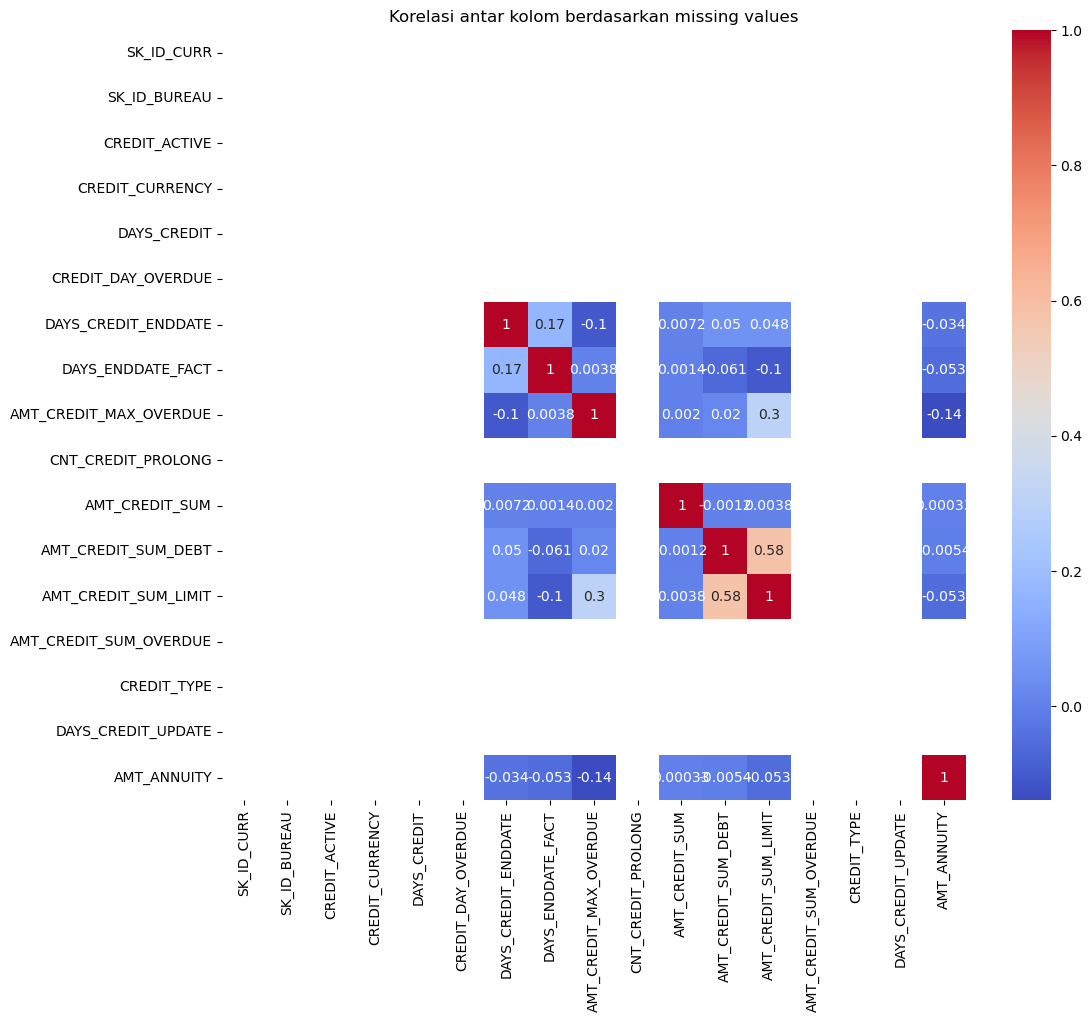

In [53]:
# Visualisasi korelasi missing
missing_binary = bureau.isnull().astype(int)
missing_corr = missing_binary.corr()
plt.figure(figsize=(12,10))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Korelasi antar kolom berdasarkan missing values")
plt.show()

In [54]:
# Drop kolom yang missing rate sangat tinggi
bureau = bureau.drop(columns=["AMT_ANNUITY"])
print("Shape setelah drop AMT_ANNUITY:", bureau.shape)

# Kolom yang di-handle dengan is_missing karena NaN artinya informasi penting
cols_keep_na = ["AMT_CREDIT_SUM_LIMIT", "AMT_CREDIT_SUM_DEBT", "DAYS_ENDDATE_FACT"]
for col in cols_keep_na:
    bureau[col + "_is_missing"] = bureau[col].isnull().astype(int)

# Imputasi untuk kolom numeric yang missingnya kecil atau artinya bisa diestimasi
cols_impute_zero = ["AMT_CREDIT_MAX_OVERDUE"]  # NaN berarti tidak ada overdue
cols_impute_median = ["DAYS_CREDIT_ENDDATE", "AMT_CREDIT_SUM"]  # NaN bisa diganti median

# Imputasi 0 untuk kolom yang logis
for col in cols_impute_zero:
    bureau[col] = bureau[col].fillna(0)

# Imputasi median untuk kolom numeric
for col in cols_impute_median:
    median_val = bureau[col].median()
    bureau[col] = bureau[col].fillna(median_val)

Shape setelah drop AMT_ANNUITY: (1716428, 16)


In [55]:
# Cek hasil missing values setelah penanganan
missing_count = bureau.isnull().sum()
missing_percent = (missing_count / len(bureau)) * 100
missing_df = pd.DataFrame({"missing_count": missing_count,
                           "missing_percent": missing_percent})
print("\nMissing values setelah cleaning:")
display(missing_df[missing_df['missing_count'] > 0])


Missing values setelah cleaning:


,missing_count,missing_percent
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_DEBT,257669,15.011932
AMT_CREDIT_SUM_LIMIT,591780,34.477415


In [56]:
# Imputasi real life untuk bureau
bureau["DAYS_ENDDATE_FACT"] = bureau["DAYS_ENDDATE_FACT"].fillna(0)
bureau["AMT_CREDIT_SUM_DEBT"] = bureau["AMT_CREDIT_SUM_DEBT"].fillna(0)
bureau["AMT_CREDIT_SUM_LIMIT"] = bureau["AMT_CREDIT_SUM_LIMIT"].fillna(0)

# Cek ulang missing
missing_count = bureau.isnull().sum()
print("Missing values setelah imputasi real life:\n", missing_count[missing_count > 0])

Missing values setelah imputasi real life:
 Series([], dtype: int64)


In [57]:
print("Bureau shape:", bureau.shape)
display(bureau.head())

Bureau shape: (1716428, 19)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_CREDIT_SUM_LIMIT_is_missing,AMT_CREDIT_SUM_DEBT_is_missing,DAYS_ENDDATE_FACT_is_missing
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0.0,0,91323.0,0.0,0.0,0.0,Consumer credit,-131,1,0,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,0.0,0.0,0,225000.0,171342.0,0.0,0.0,Credit card,-20,1,0,1
2,215354,5714464,Active,currency 1,-203,0,528.0,0.0,0.0,0,464323.5,0.0,0.0,0.0,Consumer credit,-16,1,1,1
3,215354,5714465,Active,currency 1,-203,0,-330.0,0.0,0.0,0,90000.0,0.0,0.0,0.0,Credit card,-16,1,1,1
4,215354,5714466,Active,currency 1,-629,0,1197.0,0.0,77674.5,0,2700000.0,0.0,0.0,0.0,Consumer credit,-21,1,1,1


In [58]:
# Cek semua kolom awal
print("\nKolom akhir bureau:")
print(bureau.columns.tolist())


Kolom akhir bureau:
['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_CREDIT_SUM_LIMIT_is_missing', 'AMT_CREDIT_SUM_DEBT_is_missing', 'DAYS_ENDDATE_FACT_is_missing']


### Bureau Balance

In [59]:
# Load Bureau Data
bureau_balance = pd.read_csv(
    "bureau_balance.csv",
    on_bad_lines="skip",   
    low_memory=False
)

In [60]:
# Konversi tipe data
bureau_balance["SK_ID_BUREAU"] = pd.to_numeric(bureau_balance["SK_ID_BUREAU"], errors="coerce")
bureau_balance["MONTHS_BALANCE"] = pd.to_numeric(bureau_balance["MONTHS_BALANCE"], errors="coerce")
bureau_balance["STATUS"] = bureau_balance["STATUS"].astype("category")

print("Tipe data setelah konversi:")
print(bureau_balance.dtypes)
display(bureau_balance.head())

Tipe data setelah konversi:
SK_ID_BUREAU       float64
MONTHS_BALANCE     float64
STATUS            category
dtype: object


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448.0,0.0,C
1,5715448.0,-1.0,C
2,5715448.0,-2.0,C
3,5715448.0,-3.0,C
4,5715448.0,-4.0,C


In [61]:
# Cek duplikat
duplicate_rows = bureau_balance.duplicated().sum()
print("Jumlah baris duplikat:", duplicate_rows)

Jumlah baris duplikat: 26079563


In [62]:
# Ringkasan kombinasi duplikat
dupes_summary = bureau_balance.value_counts().reset_index(name="count")
dupes_summary = dupes_summary[dupes_summary["count"] > 1]
print("Jumlah kombinasi baris duplikat unik:", dupes_summary.shape[0])
display(dupes_summary.head(20))

# Drop baris duplikat, simpan hanya baris unik
bureau_balance_dedup = bureau_balance.drop_duplicates(keep="first")
print("Shape sebelum drop:", bureau_balance.shape)
print("Shape setelah drop :", bureau_balance_dedup.shape)
print("Jumlah baris yang dihapus:", bureau_balance.shape[0] - bureau_balance_dedup.shape[0])

Jumlah kombinasi baris duplikat unik: 26079558


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,count
0,6146837.0,-38.0,C,3
1,6070821.0,-38.0,0,2
2,6796158.0,-35.0,0,2
3,6796157.0,-7.0,C,2
4,6796157.0,-6.0,C,2
5,6796157.0,-5.0,C,2
6,6796157.0,-4.0,C,2
7,6796157.0,-3.0,C,2
8,6796157.0,-2.0,C,2
9,6796157.0,-1.0,C,2


Shape sebelum drop: (53379504, 3)
Shape setelah drop : (27299941, 3)
Jumlah baris yang dihapus: 26079563


In [63]:
# Cek missing values awal
missing_count = bureau_balance_dedup.isnull().sum()
missing_percent = (missing_count / len(bureau_balance)) * 100
missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent,
    "dtype": bureau_balance_dedup.dtypes
})
print("\nTop missing values di bureau_balance.csv:")
display(missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False))


Top missing values di bureau_balance.csv:


,missing_count,missing_percent,dtype
STATUS,15,0.000028,category
MONTHS_BALANCE,13,0.000024,float64
SK_ID_BUREAU,2,0.000004,float64


In [64]:
# Identifikasi baris yang STATUS atau MONTHS_BALANCE missing
mask_missing_any = (
    bureau_balance['STATUS'].isna() |
    bureau_balance['MONTHS_BALANCE'].isna() |
    bureau_balance['SK_ID_BUREAU'].isna()
)
print(f"Jumlah baris yang akan di-drop: {mask_missing_any.sum()}")

Jumlah baris yang akan di-drop: 21


In [65]:
# Drop baris dengan missing
bureau_balance = bureau_balance[~mask_missing_any].reset_index(drop=True)

In [66]:
# Cek hasil akhir
print("Shape setelah drop:", bureau_balance.shape)

Shape setelah drop: (53379483, 3)


In [67]:
# Cek missing values setelah drop
missing_count = bureau_balance.isnull().sum()
missing_percent = (missing_count / len(bureau_balance)) * 100
missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent,
    "dtype": bureau_balance.dtypes
})
print("Missing values setelah drop:")
display(missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False))

Missing values setelah drop:


,missing_count,missing_percent,dtype


In [68]:
# Tampilkan hasil akhir
print("Bureau shape:", bureau_balance.shape)
display(bureau_balance.head())

Bureau shape: (53379483, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448.0,0.0,C
1,5715448.0,-1.0,C
2,5715448.0,-2.0,C
3,5715448.0,-3.0,C
4,5715448.0,-4.0,C


In [69]:
# Cek semua kolom akhir
print("\nKolom akhir bureau balance:")
print(bureau_balance.columns.tolist())


Kolom akhir bureau balance:
['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS']


### POS Cash Balance

In [70]:
# Load Data
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
print("POS Cash Balance shape:", pos_cash_balance.shape)
display(pos_cash_balance.head())

POS Cash Balance shape: (10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [71]:
# Cek missing values awal
missing_count = pos_cash_balance.isnull().sum()
missing_percent = (missing_count / len(pos_cash_balance)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent,
    "dtype": pos_cash_balance.dtypes
})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values(by='missing_percent', ascending=False)
print("\nTop missing values di POS_CASH_balance.csv:")
display(missing_df)


Top missing values di POS_CASH_balance.csv:


,missing_count,missing_percent,dtype
CNT_INSTALMENT_FUTURE,26087,0.260835,float64
CNT_INSTALMENT,26071,0.260675,float64


In [72]:
# Identifikasi baris dengan missing
mask_missing = pos_cash_balance['CNT_INSTALMENT'].isnull() | pos_cash_balance['CNT_INSTALMENT_FUTURE'].isnull()
missing_rows = pos_cash_balance[mask_missing]

print("Jumlah baris dengan missing:", len(missing_rows))

Jumlah baris dengan missing: 26184


In [73]:
# Tampilkan contoh 20 baris pertama yang missing
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
display(missing_rows.head(20))
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
709,1889585,403422,-6,NaN,NaN,Signed,0,0
759,1618886,382448,-2,NaN,NaN,Signed,0,0
1887,2288203,429576,-6,NaN,NaN,Signed,0,0
1899,2110224,167171,-6,NaN,NaN,Signed,0,0
1910,2031967,235187,-5,NaN,NaN,Signed,0,0
3376,1683317,185455,-44,NaN,NaN,Signed,0,0
5802,2619122,340969,-4,NaN,NaN,Returned to the store,0,0
7540,2770178,282094,-33,NaN,NaN,Signed,0,0
8119,1910110,278474,-33,NaN,NaN,Signed,0,0
8629,1112804,251721,-10,NaN,NaN,Signed,0,0


In [74]:
# Tambahkan flag is_missing untuk kolom yang memiliki missing
cols_with_missing = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']

for col in cols_with_missing:
    pos_cash_balance[col + "_is_missing"] = pos_cash_balance[col].isnull().astype(int)
    
# Cek hasil penambahan kolom is_missing
print("\nBeberapa contoh data setelah menambahkan kolom is_missing:")
display(pos_cash_balance.head(10))


Beberapa contoh data setelah menambahkan kolom is_missing:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_is_missing,CNT_INSTALMENT_FUTURE_is_missing
0,1803195,182943,-31,48.0,45.0,Active,0,0,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0,0,0


In [75]:
# Cek missing values 
missing_count_after = pos_cash_balance.isnull().sum()
missing_percent_after = (missing_count_after / len(pos_cash_balance)) * 100

missing_df_after = pd.DataFrame({
    "missing_count": missing_count_after,
    "missing_percent": missing_percent_after
})
print("\nMissing values setelah menambahkan is_missing:")
display(missing_df_after[missing_df_after['missing_count'] > 0].sort_values(by='missing_percent', ascending=False))


Missing values setelah menambahkan is_missing:


,missing_count,missing_percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675


In [76]:
# Imputasi real life untuk POS_CASH_balance
pos_cash_balance["CNT_INSTALMENT"] = pos_cash_balance["CNT_INSTALMENT"].fillna(0)
pos_cash_balance["CNT_INSTALMENT_FUTURE"] = pos_cash_balance["CNT_INSTALMENT_FUTURE"].fillna(0)

# Cek hasil imputasi
missing_count_final = pos_cash_balance.isnull().sum()
print("Missing values setelah imputasi:\n", missing_count_final[missing_count_final > 0])

Missing values setelah imputasi:
 Series([], dtype: int64)


In [77]:
# Cek semua kolom akhir
print("\nKolom akhir posh cash balance")
print(pos_cash_balance.columns.tolist())


Kolom akhir posh cash balance
['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF', 'CNT_INSTALMENT_is_missing', 'CNT_INSTALMENT_FUTURE_is_missing']


### Credit Card Balance

In [78]:
# Load data
credit_card_balance = pd.read_csv("credit_card_balance.csv")
print("Shape awal Credit Card Balance:", credit_card_balance.shape)

# Tampilkan 5 baris pertama
print("\nContoh data:")
display(credit_card_balance.head())

Shape awal Credit Card Balance: (3840312, 23)

Contoh data:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [79]:
# Cek duplikat
duplicate_rows = credit_card_balance.duplicated().sum()
print("\nJumlah baris duplikat:", duplicate_rows)


Jumlah baris duplikat: 0


In [80]:
# Tipe data
print("\nTipe data tiap kolom:")
print(credit_card_balance.dtypes)


Tipe data tiap kolom:
SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object


In [81]:
# Cek missing values
missing_count = credit_card_balance.isnull().sum()
missing_percent = (missing_count / len(credit_card_balance)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent,
    "dtype": credit_card_balance.dtypes
})

print("\nMissing values per kolom:")
display(missing_df.sort_values(by="missing_percent", ascending=False))


Missing values per kolom:


,missing_count,missing_percent,dtype
AMT_PAYMENT_CURRENT,767988,19.998063,float64
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872,float64
CNT_DRAWINGS_POS_CURRENT,749816,19.524872,float64
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872,float64
AMT_DRAWINGS_POS_CURRENT,749816,19.524872,float64
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872,float64
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872,float64
CNT_INSTALMENT_MATURE_CUM,305236,7.948208,float64
AMT_INST_MIN_REGULARITY,305236,7.948208,float64
SK_ID_PREV,0,0.000000,int64


In [82]:
cols_with_missing = [
    "AMT_PAYMENT_CURRENT",
    "AMT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "AMT_DRAWINGS_OTHER_CURRENT",
    "AMT_DRAWINGS_POS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_INSTALMENT_MATURE_CUM",
    "AMT_INST_MIN_REGULARITY"
]

for col in cols_with_missing:
    print(f"\n=== {col} ===")
    print("Deskripsi statistik:")
    print(credit_card_balance[col].describe())
    
    print("\n5 nilai paling sering:")
    print(credit_card_balance[col].value_counts(dropna=False).head())


=== AMT_PAYMENT_CURRENT ===
Deskripsi statistik:
count    3.072324e+06
mean     1.028054e+04
std      3.607808e+04
min      0.000000e+00
25%      1.523700e+02
50%      2.702700e+03
75%      9.000000e+03
max      4.289207e+06
Name: AMT_PAYMENT_CURRENT, dtype: float64

5 nilai paling sering:
NaN       767988
0.0       390507
9000.0    257297
4500.0    143572
6750.0    128296
Name: AMT_PAYMENT_CURRENT, dtype: int64

=== AMT_DRAWINGS_ATM_CURRENT ===
Deskripsi statistik:
count    3.090496e+06
mean     5.961325e+03
std      2.822569e+04
min     -6.827310e+03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.115000e+06
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64

5 nilai paling sering:
0.0        2665718
NaN         749816
4500.0       35851
9000.0       27726
45000.0      22946
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: int64

=== CNT_DRAWINGS_POS_CURRENT ===
Deskripsi statistik:
count    3.090496e+06
mean     5.594791e-01
std      3.240649e+00
min      0.000000e+0

In [83]:
# Cari kolom yang ada missing
missing_cols = credit_card_balance.columns[credit_card_balance.isna().any()].tolist()
print("Kolom dengan missing values:", missing_cols)

# Loop tiap kolom, buat flag + isi NaN dengan 0
for col in missing_cols:
    flag_col = f"{col}_is_missing"
    credit_card_balance[flag_col] = credit_card_balance[col].isna().astype(int)  # 1 jika NaN, 0 kalau tidak
    credit_card_balance[col] = credit_card_balance[col].fillna(0)

# Cek ulang hasil
print("\nMissing values setelah imputasi:")
print(credit_card_balance.isna().sum())

# Tampilkan contoh 5 baris
display(credit_card_balance.head())

Kolom dengan missing values: ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

Missing values setelah imputasi:
SK_ID_PREV                               0
SK_ID_CURR                               0
MONTHS_BALANCE                           0
AMT_BALANCE                              0
AMT_CREDIT_LIMIT_ACTUAL                  0
AMT_DRAWINGS_ATM_CURRENT                 0
AMT_DRAWINGS_CURRENT                     0
AMT_DRAWINGS_OTHER_CURRENT               0
AMT_DRAWINGS_POS_CURRENT                 0
AMT_INST_MIN_REGULARITY                  0
AMT_PAYMENT_CURRENT                      0
AMT_PAYMENT_TOTAL_CURRENT                0
AMT_RECEIVABLE_PRINCIPAL                 0
AMT_RECIVABLE                            0
AMT_TOTAL_RECEIVABLE                     0
CNT_DRAWINGS_ATM_CURRENT                

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT_is_missing,AMT_DRAWINGS_OTHER_CURRENT_is_missing,AMT_DRAWINGS_POS_CURRENT_is_missing,AMT_INST_MIN_REGULARITY_is_missing,AMT_PAYMENT_CURRENT_is_missing,CNT_DRAWINGS_ATM_CURRENT_is_missing,CNT_DRAWINGS_OTHER_CURRENT_is_missing,CNT_DRAWINGS_POS_CURRENT_is_missing,CNT_INSTALMENT_MATURE_CUM_is_missing
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0,0,0,0,0,0,0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,0,0,0,0,0,0,0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,0,0,0,0,0,0,0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,0,0,0,0,0,0,0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# Tsmpilkan kolom akhir
print("\nKolom akhir credit card balance")
print(credit_card_balance.columns.tolist())


Kolom akhir credit card balance
['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF', 'AMT_DRAWINGS_ATM_CURRENT_is_missing', 'AMT_DRAWINGS_OTHER_CURRENT_is_missing', 'AMT_DRAWINGS_POS_CURRENT_is_missing', 'AMT_INST_MIN_REGULARITY_is_missing', 'AMT_PAYMENT_CURRENT_is_missing', 'CNT_DRAWINGS_ATM_CURRENT_is_missing', 'CNT_DRAWINGS_OTHER_CURRENT_is_missing', 'CNT_DRAWINGS_POS_CURRENT_is_missing', 'CNT_INSTALMENT_MATURE_CUM_is_missing']


### Previous Application

In [85]:
# Load Data
previous_application = pd.read_csv("previous_application.csv")
print("Previous Application shape:", previous_application.shape)
display(previous_application.head())

Previous Application shape: (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Cek tipe data 
print("\nTipe data tiap kolom:")
print(previous_application.dtypes)


Tipe data tiap kolom:
SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CH

In [87]:
# Cek duplikat
duplicate_rows = previous_application.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows}")


Jumlah baris duplikat: 0


In [88]:
# Cek missing values
missing_summary = (
    previous_application.isna()
    .sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_count"})
)
missing_summary["missing_percent"] = missing_summary["missing_count"] / len(previous_application) * 100
missing_summary["dtype"] = previous_application.dtypes.values

print("Missing values per kolom:")
display(missing_summary.sort_values(by="missing_percent", ascending=False))

Missing values per kolom:


,column,missing_count,missing_percent,dtype
14,RATE_INTEREST_PRIVILEGED,1664263,99.643698,float64
13,RATE_INTEREST_PRIMARY,1664263,99.643698,float64
6,AMT_DOWN_PAYMENT,895844,53.636480,float64
12,RATE_DOWN_PAYMENT,895844,53.636480,float64
20,NAME_TYPE_SUITE,820405,49.119754,object
36,NFLAG_INSURED_ON_APPROVAL,673065,40.298129,float64
35,DAYS_TERMINATION,673065,40.298129,float64
34,DAYS_LAST_DUE,673065,40.298129,float64
33,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129,float64
32,DAYS_FIRST_DUE,673065,40.298129,float64


In [89]:
# Drop langsung kolom dengan >95% missing
cols_to_drop = ["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"]
previous_application = previous_application.drop(columns=cols_to_drop)
print("Shape setelah drop kolom >95% missing:", previous_application.shape)

Shape setelah drop kolom >95% missing: (1670214, 35)


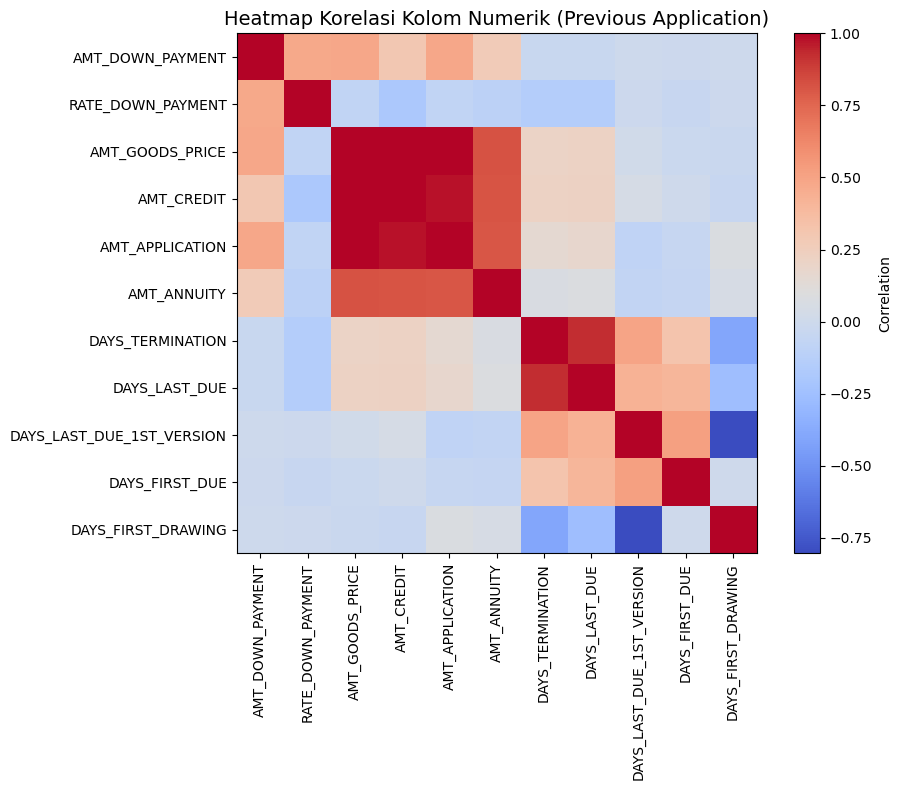

In [90]:
# Analisis korelasi kolom numerik
cols_check_relation = [
    "AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT",
    "AMT_GOODS_PRICE", "AMT_CREDIT", "AMT_APPLICATION", "AMT_ANNUITY",
    "DAYS_TERMINATION", "DAYS_LAST_DUE", "DAYS_LAST_DUE_1ST_VERSION",
    "DAYS_FIRST_DUE", "DAYS_FIRST_DRAWING"
]
cols_check_relation = [c for c in cols_check_relation if c in previous_application.columns]
corr_matrix = previous_application[cols_check_relation].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Heatmap Korelasi Kolom Numerik (Previous Application)", fontsize=14)
plt.tight_layout()
plt.show()

In [91]:
# Drop kolom redundan / terlalu banyak missing
cols_to_drop = [
    "AMT_GOODS_PRICE",
    "RATE_DOWN_PAYMENT",
    "DAYS_LAST_DUE",
    "DAYS_LAST_DUE_1ST_VERSION",
    "DAYS_FIRST_DRAWING"
]
previous_application = previous_application.drop(columns=cols_to_drop)
print("Shape setelah drop kolom redundan:", previous_application.shape)

Shape setelah drop kolom redundan: (1670214, 30)


In [92]:
# Buat flag missing untuk kolom penting
flag_cols = ['AMT_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'PRODUCT_COMBINATION']
for col in flag_cols:
    previous_application[f"{col}_is_missing"] = previous_application[col].isna().astype(int)

In [93]:
# Imputasi missing values
previous_application['AMT_DOWN_PAYMENT'] = previous_application['AMT_DOWN_PAYMENT'].fillna(0)
previous_application['NAME_TYPE_SUITE'] = previous_application['NAME_TYPE_SUITE'].fillna("Unknown")
previous_application['NFLAG_INSURED_ON_APPROVAL'] = previous_application['NFLAG_INSURED_ON_APPROVAL'].fillna(0)
previous_application['PRODUCT_COMBINATION'] = previous_application['PRODUCT_COMBINATION'].fillna("Unknown")

previous_application['AMT_ANNUITY_is_missing'] = previous_application['AMT_ANNUITY'].isna().astype(int)
previous_application['AMT_ANNUITY'] = previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median())

previous_application['CNT_PAYMENT_is_missing'] = previous_application['CNT_PAYMENT'].isna().astype(int)
previous_application['CNT_PAYMENT'] = previous_application['CNT_PAYMENT'].fillna(previous_application['CNT_PAYMENT'].median())

previous_application['DAYS_FIRST_DUE_is_missing'] = previous_application['DAYS_FIRST_DUE'].isna().astype(int)
previous_application['DAYS_FIRST_DUE'] = previous_application['DAYS_FIRST_DUE'].fillna(-999)

previous_application['DAYS_TERMINATION_is_missing'] = previous_application['DAYS_TERMINATION'].isna().astype(int)
previous_application['DAYS_TERMINATION'] = previous_application['DAYS_TERMINATION'].fillna(-999)

In [94]:
# Cek missing values akhir
def missing_summary(df):
    missing_count = df.isna().sum()
    missing_percent = 100 * missing_count / len(df)
    dtype = df.dtypes
    summary = pd.DataFrame({
        "missing_count": missing_count,
        "missing_percent": missing_percent,
        "dtype": dtype
    }).sort_values(by="missing_count", ascending=False)
    return summary

missing_after_imputation = missing_summary(previous_application)
print("Top 10 missing values setelah imputasi:")
display(missing_after_imputation.head(10))

Top 10 missing values setelah imputasi:


,missing_count,missing_percent,dtype
AMT_CREDIT,1,0.00006,float64
SK_ID_PREV,0,0.00000,int64
NFLAG_INSURED_ON_APPROVAL,0,0.00000,float64
SELLERPLACE_AREA,0,0.00000,int64
NAME_SELLER_INDUSTRY,0,0.00000,object
CNT_PAYMENT,0,0.00000,float64
NAME_YIELD_GROUP,0,0.00000,object
PRODUCT_COMBINATION,0,0.00000,object
DAYS_FIRST_DUE,0,0.00000,float64
DAYS_TERMINATION,0,0.00000,float64


In [95]:
# Imputasi dengan median
previous_application['AMT_CREDIT'] = previous_application['AMT_CREDIT'].fillna(previous_application['AMT_CREDIT'].median())

In [96]:
print("Previous Application shape:", previous_application.shape)
display(previous_application.head())

Previous Application shape: (1670214, 38)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_DOWN_PAYMENT_is_missing,NAME_TYPE_SUITE_is_missing,NFLAG_INSURED_ON_APPROVAL_is_missing,PRODUCT_COMBINATION_is_missing,AMT_ANNUITY_is_missing,CNT_PAYMENT_is_missing,DAYS_FIRST_DUE_is_missing,DAYS_TERMINATION_is_missing
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,SATURDAY,15,Y,...,-37.0,0.0,0,1,0,0,0,0,0,0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,0.0,THURSDAY,11,Y,...,365243.0,1.0,1,0,0,0,0,0,0,0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,0.0,TUESDAY,11,Y,...,365243.0,1.0,1,0,0,0,0,0,0,0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,0.0,MONDAY,7,Y,...,-177.0,1.0,1,1,0,0,0,0,0,0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,0.0,THURSDAY,9,Y,...,-999.0,0.0,1,1,1,0,0,0,1,1


In [97]:
# List kolom akhir
print("\nKolom akhir previous application")
print(previous_application.columns.tolist())


Kolom akhir previous application
['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'AMT_DOWN_PAYMENT_is_missing', 'NAME_TYPE_SUITE_is_missing', 'NFLAG_INSURED_ON_APPROVAL_is_missing', 'PRODUCT_COMBINATION_is_missing', 'AMT_ANNUITY_is_missing', 'CNT_PAYMENT_is_missing', 'DAYS_FIRST_DUE_is_missing', 'DAYS_TERMINATION_is_missing']


### Installments Payments

In [98]:
# Load data
installments_payments = pd.read_csv("installments_payments.csv")
print("Installments Payments shape:", installments_payments.shape)
display(installments_payments.head())

Installments Payments shape: (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [99]:
# Cek tipe data tiap kolom
print("\nTipe data tiap kolom:")
print(installments_payments.dtypes)


Tipe data tiap kolom:
SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object


In [100]:
# Cek duplikat
duplicate_rows = installments_payments.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows}")


Jumlah baris duplikat: 0


In [101]:
# Fungsi helper untuk ringkasan missing values
def missing_summary(df):
    missing_count = df.isna().sum()
    missing_percent = 100 * missing_count / len(df)
    dtype = df.dtypes
    summary = pd.DataFrame({
        "missing_count": missing_count,
        "missing_percent": missing_percent,
        "dtype": dtype
    }).sort_values(by="missing_count", ascending=False)
    return summary

# Cek missing values
missing_summary_df = missing_summary(installments_payments)
print("\nMissing values per kolom:")
display(missing_summary_df)


Missing values per kolom:


,missing_count,missing_percent,dtype
DAYS_ENTRY_PAYMENT,2905,0.021352,float64
AMT_PAYMENT,2905,0.021352,float64
SK_ID_PREV,0,0.000000,int64
SK_ID_CURR,0,0.000000,int64
NUM_INSTALMENT_VERSION,0,0.000000,float64
NUM_INSTALMENT_NUMBER,0,0.000000,int64
DAYS_INSTALMENT,0,0.000000,float64
AMT_INSTALMENT,0,0.000000,float64


In [102]:
# Buat flag untuk missing values
cols_to_flag = ['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']
for col in cols_to_flag:
    installments_payments[col + '_is_missing'] = installments_payments[col].isna().astype(int)

# Imputasi placeholder
installments_payments['DAYS_ENTRY_PAYMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'].fillna(-999)
installments_payments['AMT_PAYMENT'] = installments_payments['AMT_PAYMENT'].fillna(0)

# Cek ulang missing values
print("\nMissing values setelah imputasi dan flag:")
display(missing_summary(installments_payments))


Missing values setelah imputasi dan flag:


,missing_count,missing_percent,dtype
SK_ID_PREV,0,0.0,int64
SK_ID_CURR,0,0.0,int64
NUM_INSTALMENT_VERSION,0,0.0,float64
NUM_INSTALMENT_NUMBER,0,0.0,int64
DAYS_INSTALMENT,0,0.0,float64
DAYS_ENTRY_PAYMENT,0,0.0,float64
AMT_INSTALMENT,0,0.0,float64
AMT_PAYMENT,0,0.0,float64
DAYS_ENTRY_PAYMENT_is_missing,0,0.0,int32
AMT_PAYMENT_is_missing,0,0.0,int32


In [103]:
print("Installments Payments shape:", previous_application.shape)
display(installments_payments.head())

Installments Payments shape: (1670214, 38)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT_is_missing,AMT_PAYMENT_is_missing
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0,0
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0,0
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0,0
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,0,0
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,0,0


In [104]:
# List kolom akhir
print("\nKolom akhir installment payments")
print(installments_payments.columns.tolist())


Kolom akhir installment payments
['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'DAYS_ENTRY_PAYMENT_is_missing', 'AMT_PAYMENT_is_missing']


### Credit Risk Prediction

#### Logistic Regression (Train dan Test Dataset)

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Data awal
train = application_train.copy()
test = application_test.copy()

print("Tipe data awal:")
print(train.dtypes.value_counts())

Tipe data awal:
int64      21
float64    13
object     11
dtype: int64


In [107]:
# Encoding categorical
cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()
print("Jumlah fitur kategorikal:", len(cat_cols))

train_enc = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test_enc = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Samakan kolom train-test
test_enc = test_enc.reindex(columns=train_enc.columns, fill_value=0)

Jumlah fitur kategorikal: 11


In [108]:
# Pisahkan target
X = train_enc.drop(columns=["TARGET"])
y = train_enc["TARGET"]

In [109]:
# Feature Engineering
X["CREDIT_TO_GOODS"] = X["AMT_CREDIT"] / (X["AMT_GOODS_PRICE"] + 1)
X["INCOME_TO_CREDIT"] = X["AMT_INCOME_TOTAL"] / (X["AMT_CREDIT"] + 1)
X["ANNUITY_TO_INCOME"] = X["AMT_ANNUITY"] / (X["AMT_INCOME_TOTAL"] + 1)
X["LOG_AMT_CREDIT"] = np.log1p(X["AMT_CREDIT"])
X["LOG_AMT_INCOME"] = np.log1p(X["AMT_INCOME_TOTAL"])

test_enc["CREDIT_TO_GOODS"] = test_enc["AMT_CREDIT"] / (test_enc["AMT_GOODS_PRICE"] + 1)
test_enc["INCOME_TO_CREDIT"] = test_enc["AMT_INCOME_TOTAL"] / (test_enc["AMT_CREDIT"] + 1)
test_enc["ANNUITY_TO_INCOME"] = test_enc["AMT_ANNUITY"] / (test_enc["AMT_INCOME_TOTAL"] + 1)
test_enc["LOG_AMT_CREDIT"] = np.log1p(test_enc["AMT_CREDIT"])
test_enc["LOG_AMT_INCOME"] = np.log1p(test_enc["AMT_INCOME_TOTAL"])

In [110]:
# Korelasi fitur dengan TARGET
corr_matrix = train_enc.corr(numeric_only=True)
target_corr = corr_matrix["TARGET"].sort_values(ascending=False)

selected_features = target_corr[abs(target_corr) > 0.0].index.tolist()
selected_features.remove("TARGET")

print("Jumlah fitur terpilih:", len(selected_features))

X_selected = X[selected_features]
X_test_selected = test_enc[selected_features]

Jumlah fitur terpilih: 129


In [111]:
# Standardisasi
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [112]:
# Cek Multicollinearity (VIF)
vif_df = pd.DataFrame()
vif_df["feature"] = selected_features
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nTop 10 fitur dengan VIF tertinggi:")
print(vif_df.sort_values(by="VIF", ascending=False).head(10))


Top 10 fitur dengan VIF tertinggi:
                                     feature            VIF
27                           CNT_FAM_MEMBERS  495875.314155
22                              CNT_CHILDREN   63118.639300
124                    ORGANIZATION_TYPE_XNA   14243.191481
18   NAME_FAMILY_STATUS_Single / not married   13414.061150
125               NAME_INCOME_TYPE_Pensioner    9126.844918
3                   NAME_INCOME_TYPE_Working    7756.460611
55              NAME_FAMILY_STATUS_Separated    5836.386229
123                            DAYS_EMPLOYED    5681.001230
109    NAME_INCOME_TYPE_Commercial associate    5548.480737
112                 NAME_FAMILY_STATUS_Widow    4749.670619


In [113]:
# Logistic Regression + Tuning C 
log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1,
    C=10
)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring="roc_auc")
print(f"C=10 | CV ROC-AUC mean: {np.mean(cv_scores):.4f} | std: {np.std(cv_scores):.4f}")

C=10 | CV ROC-AUC mean: 0.7402 | std: 0.0021


#### Logistic Regression (Dengan Dataset Tambahan)

In [118]:
# Threshold 50%
threshold = 50  

# Hitung persentase missing
null_percent_train = train_final.isnull().mean() * 100

# Tentukan kolom yang akan di-drop
cols_to_drop = null_percent_train[null_percent_train > threshold].index.tolist()
print(f"Jumlah kolom yang di-drop (> {threshold}% missing):", len(cols_to_drop))

# Drop kolom di train & test
train_final.drop(columns=cols_to_drop, inplace=True)
test_final.drop(columns=cols_to_drop, inplace=True)

# Cek jumlah kolom tersisa
print("Jumlah kolom tersisa di train:", train_final.shape[1])
print("Jumlah kolom tersisa di test :", test_final.shape[1])

Jumlah kolom yang di-drop (> 50% missing): 156
Jumlah kolom tersisa di train: 350
Jumlah kolom tersisa di test : 349


In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [131]:
# Set utama
train_ids = set(application_train["SK_ID_CURR"])
test_ids = set(application_test["SK_ID_CURR"])
all_ids = train_ids.union(test_ids)

# Info dasar
print("Jumlah SK_ID_CURR di train :", len(train_ids))
print("Jumlah SK_ID_CURR di test  :", len(test_ids))
print("Total unik SK_ID_CURR      :", len(all_ids))
print()

# Daftar tabel satelit yang dicek
for name, df, col in [
    ("bureau", bureau, "SK_ID_CURR"),
    ("credit_card_balance", credit_card_balance, "SK_ID_CURR"),
    ("previous_application", previous_application, "SK_ID_CURR"),
    ("installments_payments", installments_payments, "SK_ID_CURR"),
    ("pos_cash_balance", pos_cash_balance, "SK_ID_CURR")   # ditambahkan
]:
    ids = set(df[col])
    overlap = len(all_ids.intersection(ids))
    print(f"{name:<25} -> Jumlah unik ID: {len(ids):<8} | Overlap dengan train+test: {overlap}")

Jumlah SK_ID_CURR di train : 307511
Jumlah SK_ID_CURR di test  : 48744
Total unik SK_ID_CURR      : 356255

bureau                    -> Jumlah unik ID: 305811   | Overlap dengan train+test: 305811
credit_card_balance       -> Jumlah unik ID: 103558   | Overlap dengan train+test: 103558
previous_application      -> Jumlah unik ID: 338857   | Overlap dengan train+test: 338857
installments_payments     -> Jumlah unik ID: 339587   | Overlap dengan train+test: 339587
pos_cash_balance          -> Jumlah unik ID: 337252   | Overlap dengan train+test: 337252


In [132]:
def aggregate_table(df, group_var, df_name):
    """
    Agregasi tabel satelit (one-to-many) → one-to-one berdasarkan SK_ID_CURR.
    - Numerik   : mean, max, min, sum, std
    - Kategorik : modus (nilai terbanyak)
    """
    # pisahkan numeric dan categorical
    num_df = df.select_dtypes(include=["number"])
    cat_df = df.select_dtypes(include=["object", "category"])
    
    # Numeric aggregation
    if len(num_df.columns) > 0:
        num_agg = num_df.groupby(df[group_var]).agg(["mean", "max", "min", "sum", "std"])
        num_agg.columns = [df_name + "_" + "_".join(col).upper() for col in num_agg.columns]
    else:
        num_agg = pd.DataFrame()
    
    # Categorical aggregation (modus)
    if len(cat_df.columns) > 0:
        cat_agg = cat_df.groupby(df[group_var]).agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        cat_agg.columns = [df_name + "_" + col.upper() + "_MODE" for col in cat_agg.columns]
    else:
        cat_agg = pd.DataFrame()
    
    # gabung numeric + categorical
    if not num_agg.empty and not cat_agg.empty:
        agg = pd.concat([num_agg, cat_agg], axis=1)
    elif not num_agg.empty:
        agg = num_agg
    else:
        agg = cat_agg
    
    agg.reset_index(inplace=True)
    return agg

# Agregasi masing-masing tabel
bureau_agg = aggregate_table(bureau, "SK_ID_CURR", "BUREAU")
cc_agg     = aggregate_table(credit_card_balance, "SK_ID_CURR", "CC")
prev_agg   = aggregate_table(previous_application, "SK_ID_CURR", "PREV")
inst_agg   = aggregate_table(installments_payments, "SK_ID_CURR", "INST")
pos_agg    = aggregate_table(pos_cash_balance, "SK_ID_CURR", "POS")

# Merge ke Train/Test
train_final = application_train.copy()
test_final  = application_test.copy()

for agg in [bureau_agg, cc_agg, prev_agg, inst_agg, pos_agg]:
    train_final = train_final.merge(agg, on="SK_ID_CURR", how="left")
    test_final  = test_final.merge(agg, on="SK_ID_CURR", how="left")

print("Train final shape:", train_final.shape)
print("Test final shape :", test_final.shape)

Train final shape: (307511, 506)
Test final shape : (48744, 505)


In [133]:
# Persentase kolom null di train_final
null_percent = train_final.isnull().mean() * 100
null_summary = null_percent[null_percent > 0].sort_values(ascending=False)
print(null_summary)

CC_MONTHS_BALANCE_STD                         71.944743
CC_AMT_PAYMENT_CURRENT_STD                    71.944743
CC_CNT_DRAWINGS_ATM_CURRENT_STD               71.944743
CC_CNT_DRAWINGS_POS_CURRENT_IS_MISSING_STD    71.944743
CC_AMT_TOTAL_RECEIVABLE_STD                   71.944743
                                                ...    
INST_AMT_INSTALMENT_MAX                        5.160141
INST_AMT_INSTALMENT_MEAN                       5.160141
INST_DAYS_ENTRY_PAYMENT_SUM                    5.160141
INST_DAYS_ENTRY_PAYMENT_MIN                    5.160141
INST_AMT_PAYMENT_IS_MISSING_SUM                5.160141
Length: 461, dtype: float64


In [134]:
# Persentase kolom null di test_final
null_percent_test = test_final.isnull().mean() * 100
null_summary_test = null_percent_test[null_percent_test > 0].sort_values(ascending=False)
print(null_summary_test)

CC_MONTHS_BALANCE_STD                         65.958887
CC_AMT_PAYMENT_CURRENT_STD                    65.958887
CC_CNT_DRAWINGS_ATM_CURRENT_STD               65.958887
CC_CNT_DRAWINGS_POS_CURRENT_IS_MISSING_STD    65.958887
CC_AMT_TOTAL_RECEIVABLE_STD                   65.958887
                                                ...    
INST_AMT_INSTALMENT_MIN                        1.641228
INST_AMT_INSTALMENT_MAX                        1.641228
INST_AMT_INSTALMENT_MEAN                       1.641228
INST_DAYS_ENTRY_PAYMENT_SUM                    1.641228
INST_DAYS_ENTRY_PAYMENT_MEAN                   1.641228
Length: 461, dtype: float64


In [135]:
# Ambil kolom yang sama di train & test
common_cols = train_final.columns.intersection(test_final.columns).tolist()

# Pastikan SK_ID_CURR hanya 1x
common_cols = [c for c in common_cols if c != "SK_ID_CURR"]
common_cols = ["SK_ID_CURR"] + common_cols

# Terapkan ke train & test
train_final = train_final[common_cols + ["TARGET"]]  # TARGET terakhir
test_final = test_final[common_cols]

print("Jumlah kolom di train setelah disamakan:", train_final.shape[1])
print("Jumlah kolom di test setelah disamakan :", test_final.shape[1])

Jumlah kolom di train setelah disamakan: 506
Jumlah kolom di test setelah disamakan : 505


In [136]:
# Ambil list kolom
train_cols = set(train_final.columns)
test_cols = set(test_final.columns)

# Kolom yang ada di kedua dataset (intersection)
common_cols = sorted(train_cols.intersection(test_cols))
print("Jumlah kolom yang sama di train & test:", len(common_cols))
print("Kolom yang sama:")
print(common_cols)

# Kolom yang hanya ada di train
train_only = sorted(train_cols - test_cols)
print("\nJumlah kolom hanya di train:", len(train_only))
print("Kolom unik di train:")
print(train_only)

# Kolom yang hanya ada di test
test_only = sorted(test_cols - train_cols)
print("\nJumlah kolom hanya di test:", len(test_only))
print("Kolom unik di test:")
print(test_only)

Jumlah kolom yang sama di train & test: 505
Kolom yang sama:
['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_STD', 'BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM', 'BUREAU_AMT_CREDIT_SUM_DEBT_IS_MISSING_MAX', 'BUREAU_AMT_CREDIT_SUM_DEBT_IS_MISSING_MEAN', 'BUREAU_AMT_CREDIT_SUM_DEBT_IS_MISSING_MIN', 'BUREAU_AMT_CREDIT_SUM_DEBT_IS_MISSING_STD', 'BUREAU_AMT_CREDIT_SUM_DEBT_IS_MISSING_SUM', 'BUREAU_AMT_CREDIT_SUM_DEBT_MAX', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN', 'BUREAU_AMT_CREDIT_SUM_DEBT_MIN', 'BUREAU_AMT_CREDIT_SUM_DEBT_STD', 'BUREAU_AMT_CREDIT_SUM_DEBT_SUM', 'BUREAU_AMT_CREDIT_SUM_LIMIT_IS_MISSING_MAX', 'BUREAU_AMT_CREDIT_SUM_LIMIT_IS_MISSING_MEAN', 'BUREAU_AMT_CREDIT_SUM_LIMIT_IS_MISSING_MIN', 'BUREAU_AMT_CREDIT_SUM_LIMIT_IS_MISSING_STD', 'BUREAU_AMT_CREDIT_SUM_LIMIT_IS_MISSING_SUM', 'BUREAU_AMT_CREDIT_SUM_LIM

In [137]:
# Persentase missing di train
missing_train = train_final.isnull().mean() * 100
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
print("Missing value di TRAIN:")
print(missing_train)

# Persentase missing di test
missing_test = test_final.isnull().mean() * 100
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print("\nMissing value di TEST:")
print(missing_test)

Missing value di TRAIN:
CC_MONTHS_BALANCE_STD                         71.944743
CC_AMT_PAYMENT_CURRENT_STD                    71.944743
CC_CNT_DRAWINGS_ATM_CURRENT_STD               71.944743
CC_CNT_DRAWINGS_POS_CURRENT_IS_MISSING_STD    71.944743
CC_AMT_TOTAL_RECEIVABLE_STD                   71.944743
                                                ...    
INST_AMT_INSTALMENT_MAX                        5.160141
INST_AMT_INSTALMENT_MEAN                       5.160141
INST_DAYS_ENTRY_PAYMENT_SUM                    5.160141
INST_DAYS_ENTRY_PAYMENT_MIN                    5.160141
INST_AMT_PAYMENT_IS_MISSING_SUM                5.160141
Length: 461, dtype: float64

Missing value di TEST:
CC_MONTHS_BALANCE_STD                         65.958887
CC_AMT_PAYMENT_CURRENT_STD                    65.958887
CC_CNT_DRAWINGS_ATM_CURRENT_STD               65.958887
CC_CNT_DRAWINGS_POS_CURRENT_IS_MISSING_STD    65.958887
CC_AMT_TOTAL_RECEIVABLE_STD                   65.958887
                            

In [138]:
# Train
missing_train = train_final.isnull().mean() * 100
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
missing_train_list = list(zip(missing_train.index, missing_train.values))
print("Missing value di TRAIN (list):")
print(missing_train_list)

# Test
missing_test = test_final.isnull().mean() * 100
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
missing_test_list = list(zip(missing_test.index, missing_test.values))
print("\nMissing value di TEST (list):")
print(missing_test_list)

Missing value di TRAIN (list):
[('CC_MONTHS_BALANCE_STD', 71.94474344007207), ('CC_AMT_PAYMENT_CURRENT_STD', 71.94474344007207), ('CC_CNT_DRAWINGS_ATM_CURRENT_STD', 71.94474344007207), ('CC_CNT_DRAWINGS_POS_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_TOTAL_RECEIVABLE_STD', 71.94474344007207), ('CC_CNT_DRAWINGS_OTHER_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_RECIVABLE_STD', 71.94474344007207), ('CC_CNT_DRAWINGS_ATM_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_RECEIVABLE_PRINCIPAL_STD', 71.94474344007207), ('CC_AMT_PAYMENT_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_PAYMENT_TOTAL_CURRENT_STD', 71.94474344007207), ('CC_AMT_INST_MIN_REGULARITY_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_DRAWINGS_POS_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_CNT_DRAWINGS_CURRENT_STD', 71.94474344007207), ('CC_AMT_INST_MIN_REGULARITY_STD', 71.94474344007207), ('CC_AMT_DRAWINGS_OTHER_CURRENT_IS_MISSING_STD', 71.94474344007207), ('CC_AMT_DRAWINGS_POS_CURRENT_S

In [143]:
# Suffix yang dianggap agregat
agg_suffixes = ["_MEAN", "_MAX", "_MIN", "_SUM", "_STD"]

# Ambil "kolom utama" dari daftar yang di-drop
base_cols_to_drop = [col.split("_")[0] if "_" not in col else "_".join(col.split("_")[:-1])
                     for col in cols_to_drop]

agg_cols_to_drop = []

# Cari semua kolom yang diawali oleh kolom utama + suffix
for base in base_cols_to_drop:
    agg_cols_to_drop += [c for c in train_final.columns 
                         if c.startswith(base) and any(c.endswith(s) for s in agg_suffixes)]

# Drop di train & test
train_final.drop(columns=cols_to_drop + agg_cols_to_drop, inplace=True, errors="ignore")
test_final.drop(columns=cols_to_drop + agg_cols_to_drop, inplace=True, errors="ignore")

print("Kolom utama yang di-drop:", cols_to_drop)
print("Kolom agregasi yang ikut di-drop:", agg_cols_to_drop)

Kolom utama yang di-drop: ['CC_AMT_INST_MIN_REGULARITY_SUM', 'CC_SK_ID_PREV_MEAN', 'CC_AMT_RECIVABLE_STD', 'CC_CNT_DRAWINGS_POS_CURRENT_STD', 'CC_CNT_DRAWINGS_POS_CURRENT_SUM', 'CC_AMT_PAYMENT_CURRENT_MIN', 'CC_CNT_DRAWINGS_CURRENT_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_IS_MISSING_MIN', 'CC_MONTHS_BALANCE_MAX', 'CC_CNT_DRAWINGS_ATM_CURRENT_IS_MISSING_STD', 'CC_AMT_BALANCE_STD', 'CC_AMT_DRAWINGS_CURRENT_MEAN', 'CC_AMT_PAYMENT_CURRENT_IS_MISSING_STD', 'CC_MONTHS_BALANCE_MEAN', 'CC_SK_DPD_DEF_STD', 'CC_AMT_PAYMENT_TOTAL_CURRENT_SUM', 'CC_AMT_DRAWINGS_CURRENT_MAX', 'CC_AMT_RECEIVABLE_PRINCIPAL_MEAN', 'CC_SK_ID_CURR_MIN', 'CC_SK_DPD_DEF_MAX', 'CC_AMT_DRAWINGS_POS_CURRENT_MEAN', 'CC_AMT_DRAWINGS_POS_CURRENT_MIN', 'CC_CNT_INSTALMENT_MATURE_CUM_SUM', 'CC_AMT_BALANCE_MIN', 'CC_CNT_DRAWINGS_ATM_CURRENT_IS_MISSING_MAX', 'CC_AMT_INST_MIN_REGULARITY_IS_MISSING_MIN', 'CC_CNT_DRAWINGS_POS_CURRENT_MEAN', 'CC_CNT_INSTALMENT_MATURE_CUM_IS_MISSING_MEAN', 'CC_AMT_DRAWINGS_ATM_CURRENT_MAX', 'CC_CNT_DRAWINGS_PO

In [144]:
# Identifikasi kolom dengan missing
missing_train = train_final.isnull().mean() * 100
missing_train = missing_train[missing_train > 0]

# Pisahkan kolom berdasarkan tipe 
num_cols = [col for col in missing_train.index if train_final[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in missing_train.index if train_final[col].dtype == 'object']
flag_cols = [col for col in missing_train.index if 'IS_MISSING' in col or 'FLAG' in col]

# Imputasi numerik: median dari train, diterapkan ke test 
for col in num_cols:
    median_val = train_final[col].median()
    train_final[col].fillna(median_val, inplace=True)
    if col in test_final.columns:
        test_final[col].fillna(median_val, inplace=True)

# Imputasi kategorik: mode atau 'Missing'
for col in cat_cols:
    train_final[col].fillna('Missing', inplace=True)
    if col in test_final.columns:
        test_final[col].fillna('Missing', inplace=True)

# Imputasi flag / IS_MISSING: isi 0 
for col in flag_cols:
    train_final[col].fillna(0, inplace=True)
    if col in test_final.columns:
        test_final[col].fillna(0, inplace=True)

# Cek hasil
train_missing_after = train_final.isnull().mean() * 100
test_missing_after = test_final.isnull().mean() * 100

print("Missing values after imputation (train):")
print(train_missing_after[train_missing_after > 0].to_dict())

print("\nMissing values after imputation (test):")
print(test_missing_after[test_missing_after > 0].to_dict())

Missing values after imputation (train):
{}

Missing values after imputation (test):
{}


In [145]:
print("\nShape train_final:", train_final.shape)
print("Shape test_final :", test_final.shape)


Shape train_final: (307511, 350)
Shape test_final : (48744, 349)


In [146]:
# Pisahkan target
X = train_final.drop(columns=["TARGET"])
y = train_final["TARGET"]

In [147]:
for df in [X, test_final]:
    df["CREDIT_TO_GOODS"] = df["AMT_CREDIT"] / (df["AMT_GOODS_PRICE"] + 1)
    df["INCOME_TO_CREDIT"] = df["AMT_INCOME_TOTAL"] / (df["AMT_CREDIT"] + 1)
    df["ANNUITY_TO_INCOME"] = df["AMT_ANNUITY"] / (df["AMT_INCOME_TOTAL"] + 1)
    df["LOG_AMT_CREDIT"] = np.log1p(df["AMT_CREDIT"])
    df["LOG_AMT_INCOME"] = np.log1p(df["AMT_INCOME_TOTAL"])

In [148]:
# Encoding categorical variables
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cols:
    freq = X[col].value_counts(normalize=True)
    rare = freq[freq < 0.01].index
    X[col] = X[col].replace(rare, "Other")
    if col in test_final.columns:
        test_final[col] = test_final[col].replace(rare, "Other")

In [149]:
train_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)
test_enc = pd.get_dummies(test_final, columns=cat_cols, drop_first=True)

# Samakan kolom train-test
test_enc = test_enc.reindex(columns=train_enc.columns, fill_value=0)

In [151]:
# Preselection berdasarkan univariate score 
top_k = 100  
selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
selector.fit(train_enc, y)

selected_cols = train_enc.columns[selector.get_support()].tolist()
print(f"Jumlah fitur setelah preselection: {len(selected_cols)}")

X_selected = train_enc[selected_cols]
X_test_selected = test_enc[selected_cols]

Jumlah fitur setelah preselection: 100


In [152]:
# Scaling
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(train_enc)
X_test_scaled = scaler.transform(test_enc)

In [153]:
# Hyperparameter Tuning (C)
from sklearn.model_selection import StratifiedKFold, cross_val_score

C_values = [0.01, 0.1, 1, 10]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_score = 0
best_C = None

for C in C_values:
    log_reg = LogisticRegression(
        penalty='l1',
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        C=C,
        n_jobs=-1,
        random_state=42
    )
    cv_scores = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring='roc_auc', n_jobs=-1)
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)
    print(f"C={C} | CV ROC-AUC mean: {mean_score:.4f} | std: {std_score:.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_C = C

C=0.01 | CV ROC-AUC mean: 0.7647 | std: 0.0041
C=0.1 | CV ROC-AUC mean: 0.7651 | std: 0.0041
C=1 | CV ROC-AUC mean: 0.7650 | std: 0.0041
C=10 | CV ROC-AUC mean: 0.7650 | std: 0.0041


In [155]:
# Train best model
log_reg_best = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=1000,
    class_weight='balanced',
    C=best_C,
    n_jobs=-1,
    random_state=42
)

In [157]:
# Cross-validation prediction untuk menghitung metrics
y_pred = cross_val_predict(log_reg_best, X_scaled, y, cv=cv, method='predict', n_jobs=-1)
y_prob = cross_val_predict(log_reg_best, X_scaled, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]

In [158]:
# Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

print(f"\nBest C: {best_C}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Best C: 0.1
Accuracy: 0.7030
Precision: 0.1704
Recall: 0.6925
F1 Score: 0.2735
ROC-AUC: 0.7651


Interpretasi bisnis: Model ini cukup untuk baseline dan memberikan gambaran awal risiko gagal bayar. Recall cukup tinggi, artinya sebagian besar nasabah berisiko gagal bayar terdeteksi, tapi precision rendah → banyak false alarm (nasabah yang sebenarnya aman tapi ditandai berisiko). Cocok untuk evaluasi cepat atau interpretasi awal.

In [159]:
# Fit pada seluruh dataset dan prediksi test
log_reg_best.fit(X_scaled, y)
y_test_prob = log_reg_best.predict_proba(X_test_scaled)[:,1]
y_test_pred = (y_test_prob >= 0.5).astype(int)

C:\Users\HP OMEN ID\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### LightGBM (Dengan Dataset Tambahan)

In [160]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

In [161]:
# Gunakan fitur terpilih
X_lgb = X_selected
X_test_lgb = X_test_selected

In [167]:
# LightGBM Parameters 
lgb_params_tuned = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'num_leaves': 50,          
    'max_depth': 8,            
    'learning_rate': 0.03,     
    'subsample': 0.85,
    'colsample_bytree': 0.85,
    'reg_alpha': 0.2,          
    'reg_lambda': 0.2,         
    'n_jobs': -1,
    'seed': 42,
    'is_unbalance': True       
}

cv_auc_scores = []
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []
best_iterations = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_lgb, y)):
    X_train, X_val = X_lgb.iloc[train_idx], X_lgb.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

    model = lgb.train(
        params=lgb_params_tuned,
        train_set=lgb_train,
        num_boost_round=2000,  # lebih banyak karena learning_rate kecil
        valid_sets=[lgb_val],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(period=0)]
    )

    best_iterations.append(model.best_iteration)
    y_val_pred_prob = model.predict(X_val, num_iteration=model.best_iteration)
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)

    cv_auc_scores.append(roc_auc_score(y_val, y_val_pred_prob))
    cv_accuracy.append(accuracy_score(y_val, y_val_pred))
    cv_precision.append(precision_score(y_val, y_val_pred))
    cv_recall.append(recall_score(y_val, y_val_pred))
    cv_f1.append(f1_score(y_val, y_val_pred))

print(f"CV ROC-AUC: {np.mean(cv_auc_scores):.4f} ± {np.std(cv_auc_scores):.4f}")
print(f"CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"CV Precision: {np.mean(cv_precision):.4f}")
print(f"CV Recall: {np.mean(cv_recall):.4f}")
print(f"CV F1 Score: {np.mean(cv_f1):.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4944
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 99
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [168]:
# Training Final Model on Full Data 
final_num_boost_round = int(np.mean(best_iterations) * 1.1)
lgb_full_train = lgb.Dataset(X_lgb, label=y)

final_model = lgb.train(
    params=lgb_params,
    train_set=lgb_full_train,
    num_boost_round=final_num_boost_round
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4941
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486


In [169]:
# Prediksi Test Data 
y_test_pred_prob = final_model.predict(X_test_lgb)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

In [170]:
# Hitung metrik pada full train
y_train_pred_prob = final_model.predict(X_lgb)
y_train_pred = (y_train_pred_prob >= 0.5).astype(int)

accuracy = accuracy_score(y, y_train_pred)
precision = precision_score(y, y_train_pred)
recall = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)
roc_auc = roc_auc_score(y, y_train_pred_prob)

print(f"\nFull Train Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Full Train Metrics:
Accuracy: 0.7299
Precision: 0.1959
Recall: 0.7559
F1 Score: 0.3112
ROC-AUC: 0.8236


Interpretasi bisnis: LightGBM lebih sensitif terhadap pola kompleks, menangani fitur banyak dan ketidakseimbangan kelas lebih baik. Recall meningkat → lebih banyak calon gagal bayar yang terdeteksi. Precision sedikit naik → false alarm masih tinggi tapi lebih terkendali. Cocok untuk model produksi menengah yang ingin memaksimalkan deteksi risiko dengan dataset besar.

#### Random Forest (Dengan Dataset Tambahan)

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

In [175]:
# Dataset
X_rf = X_selected
X_test_rf = X_test_selected

In [176]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_scores = []
cv_accuracy = []
cv_precision = []
cv_recall = []
cv_f1 = []

In [195]:
# Random Forest parameters
rf_params = {
    "n_estimators": 1000,      
    "max_depth": 18,          
    "min_samples_split": 15,
    "min_samples_leaf": 7,
    "max_features": "sqrt",
    "class_weight": "balanced", 
    "n_jobs": -1,
    "random_state": 42
}

In [196]:
# Cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_rf, y)):
    X_train, X_val = X_rf.iloc[train_idx], X_rf.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    rf_model = RandomForestClassifier(**rf_params)
    rf_model.fit(X_train, y_train)
    
    y_val_pred_prob = rf_model.predict_proba(X_val)[:, 1]
    y_val_pred = rf_model.predict(X_val)
    
    cv_auc_scores.append(roc_auc_score(y_val, y_val_pred_prob))
    cv_accuracy.append(accuracy_score(y_val, y_val_pred))
    cv_precision.append(precision_score(y_val, y_val_pred))
    cv_recall.append(recall_score(y_val, y_val_pred))
    cv_f1.append(f1_score(y_val, y_val_pred))

# Rata-rata CV metrics
print(f"CV ROC-AUC: {np.mean(cv_auc_scores):.4f} ± {np.std(cv_auc_scores):.4f}")
print(f"CV Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"CV Precision: {np.mean(cv_precision):.4f}")
print(f"CV Recall: {np.mean(cv_recall):.4f}")
print(f"CV F1 Score: {np.mean(cv_f1):.4f}")

CV ROC-AUC: 0.7392 ± 0.0038
CV Accuracy: 0.8252
CV Precision: 0.2180
CV Recall: 0.4067
CV F1 Score: 0.2708


In [197]:
# Training final model on full data
rf_final = RandomForestClassifier(**rf_params)
rf_final.fit(X_rf, y)

RandomForestClassifier(class_weight='balanced', max_depth=18,
                       min_samples_leaf=7, min_samples_split=15,
                       n_estimators=1000, n_jobs=-1, random_state=42)

In [198]:
# Prediksi pada full train
y_train_pred_prob = rf_final.predict_proba(X_rf)[:, 1]
y_train_pred = rf_final.predict(X_rf)

In [199]:
accuracy = accuracy_score(y, y_train_pred)
precision = precision_score(y, y_train_pred)
recall = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)
roc_auc = roc_auc_score(y, y_train_pred_prob)

print(f"\nFull Train Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Full Train Metrics:
Accuracy: 0.9502
Precision: 0.6347
Recall: 0.9027
F1 Score: 0.7453
ROC-AUC: 0.9830


In [200]:
# Prediksi pada test set
y_test_pred_prob = rf_final.predict_proba(X_test_rf)[:, 1]
y_test_pred = rf_final.predict(X_test_rf)

Interpretasi bisnis: Random Forest unggul dalam semua metrik. Recall tinggi → hampir semua nasabah berisiko gagal bayar berhasil dideteksi. Precision jauh lebih tinggi dibanding model lain → false alarm lebih sedikit, meminimalkan keputusan kredit yang terlalu konservatif. ROC-AUC mendekati sempurna → model sangat handal dalam membedakan risiko.